In [1]:
!pip install kagglehub

In [2]:

import tensorflow as tf
print("Num GPUs Available:", len(tf.config.list_physical_devices('GPU')))


Num GPUs Available: 1


In [3]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("dansbecker/food-101")

print("Path to dataset files:", path)

Path to dataset files: C:\Users\student\.cache\kagglehub\datasets\dansbecker\food-101\versions\1


In [4]:
import tensorflow as tf

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import os


In [6]:
from tensorflow import keras
from tensorflow.keras.preprocessing import image_dataset_from_directory

In [7]:
import os

dataset_path = r"C:\Users\student\.cache\kagglehub\datasets\dansbecker\food-101\versions\1"
food101_path = os.path.join(dataset_path, "food-101")

# List contents of food-101 folder
if os.path.exists(food101_path):
    print("✅ 'food-101' folder exists!")
    print("📂 Contents:", os.listdir(food101_path))
else:
    print("❌ 'food-101' folder NOT found!")


✅ 'food-101' folder exists!
📂 Contents: ['food-101', '__MACOSX']


In [8]:
train_dataset = image_dataset_from_directory(
    r"C:\Users\student\.cache\kagglehub\datasets\dansbecker\food-101\versions\1\food-101\food-101\images",
    image_size=(224, 224),
    batch_size=32,
    validation_split=0.2,
    subset="training",
    seed=123
)


Found 101000 files belonging to 101 classes.
Using 80800 files for training.


In [9]:
val_dataset = image_dataset_from_directory(
    r"C:\Users\student\.cache\kagglehub\datasets\dansbecker\food-101\versions\1\food-101\food-101\images",
    image_size=(224, 224),
    batch_size=32,
    validation_split=0.2,
    subset="validation",
    seed=123
)


Found 101000 files belonging to 101 classes.
Using 20200 files for validation.


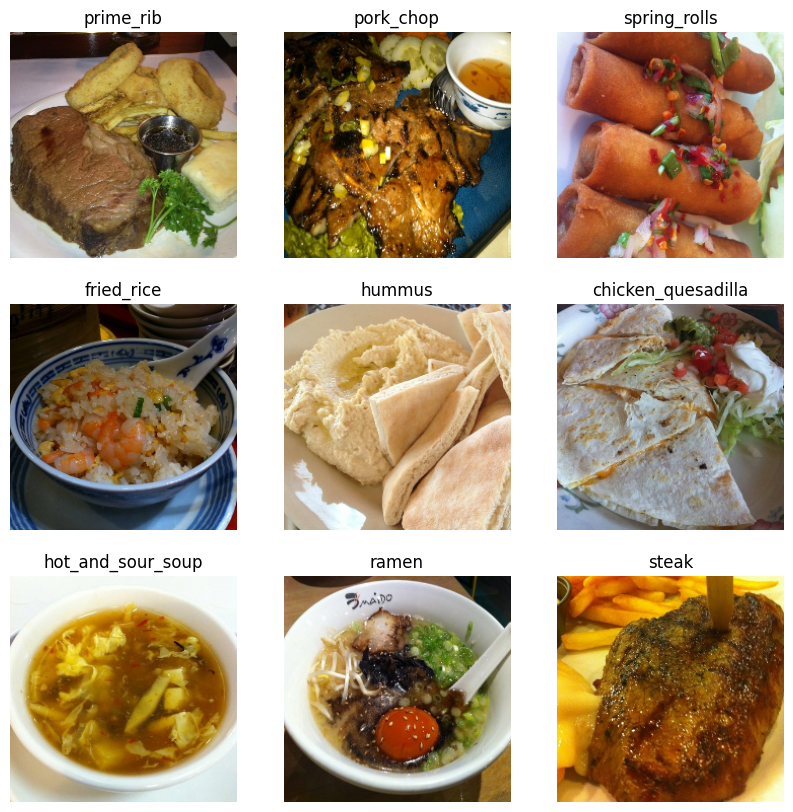

In [10]:
import matplotlib.pyplot as plt

class_names = train_dataset.class_names

plt.figure(figsize=(10, 10))
for images, labels in train_dataset.take(1):  # Take one batch
    for i in range(9):  # Show first 9 images
        plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i].numpy()])
        plt.axis("off")
plt.show()


In [11]:
for images, labels in train_dataset.take(1):
    print(labels[:10])  # Print first 10 labels


tf.Tensor([84 83 57 52 54  5 88 44 49 27], shape=(10,), dtype=int32)


In [12]:
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input

def preprocess(image, label):
    image = preprocess_input(image)  # Normalize images
    return image, label

train_dataset = train_dataset.map(preprocess)
val_dataset = val_dataset.map(preprocess)


In [13]:
train_dataset = image_dataset_from_directory(
    r"C:\Users\student\.cache\kagglehub\datasets\dansbecker\food-101\versions\1\food-101\food-101\images",
    image_size=(224, 224),
    batch_size=32,
    validation_split=0.2,
    subset="training",
    seed=123  # Ensure same seed
)

val_dataset = image_dataset_from_directory(
    r"C:\Users\student\.cache\kagglehub\datasets\dansbecker\food-101\versions\1\food-101\food-101\images",
    image_size=(224, 224),
    batch_size=32,
    validation_split=0.2,
    subset="validation",
    seed=123  # Ensure same seed
)



Found 101000 files belonging to 101 classes.
Using 80800 files for training.
Found 101000 files belonging to 101 classes.
Using 20200 files for validation.


In [14]:
for images, labels in train_dataset.take(1):
    print("Labels (first batch):", labels.numpy())
    print("Label range:", labels.numpy().min(), "-", labels.numpy().max())


Labels (first batch): [79 77 92 44 57 19 54 81 93 17 22 88 36 58 48 56 82 73 83  1 28 16 83 34
 59 38 27  5 47 41 90 44]
Label range: 1 - 93


In [15]:
import numpy as np

all_labels = []
for _, labels in train_dataset:
    all_labels.extend(labels.numpy())

unique_labels = np.unique(all_labels)
print("Unique labels:", unique_labels)
print("Total unique labels:", len(unique_labels))


Unique labels: [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100]
Total unique labels: 101


In [16]:
print("Total classes:", len(train_dataset.class_names))
print("Class names:", train_dataset.class_names[:10])  # Print first 10


Total classes: 101
Class names: ['apple_pie', 'baby_back_ribs', 'baklava', 'beef_carpaccio', 'beef_tartare', 'beet_salad', 'beignets', 'bibimbap', 'bread_pudding', 'breakfast_burrito']


In [17]:
import numpy as np

all_labels = []
for _, labels in train_dataset:
    all_labels.extend(labels.numpy())

unique_labels = np.unique(all_labels)
print("Unique labels:", unique_labels)
print("Total unique labels:", len(unique_labels))


Unique labels: [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100]
Total unique labels: 101


In [18]:
import tensorflow as tf
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.layers import Dense, Dropout, GlobalAveragePooling2D
from tensorflow.keras.models import Model



# Load MobileNetV2 as base model (pretrained on ImageNet)
base_model = MobileNetV2(input_shape=(224, 224, 3), include_top=False, weights='imagenet')
base_model.trainable = False  # Freeze base model

# Add custom layers
x = GlobalAveragePooling2D()(base_model.output)  # Convert features into a single vector
x = Dense(512, activation='relu')(x)  # Fully connected layer
x = Dropout(0.3)(x)  # Regularization to prevent overfitting
output = Dense(101, activation='softmax')(x)  # Output layer for 101 classes

# Create the final model
model = Model(inputs=base_model.input, outputs=output)
for layer in model.layers:
    print(layer.name, layer.trainable)

for layer in base_model.layers:
    layer.trainable = True


# Compile the model
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=1e-4),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# Model summary
model.summary()


input_1 False
Conv1 False
bn_Conv1 False
Conv1_relu False
expanded_conv_depthwise False
expanded_conv_depthwise_BN False
expanded_conv_depthwise_relu False
expanded_conv_project False
expanded_conv_project_BN False
block_1_expand False
block_1_expand_BN False
block_1_expand_relu False
block_1_pad False
block_1_depthwise False
block_1_depthwise_BN False
block_1_depthwise_relu False
block_1_project False
block_1_project_BN False
block_2_expand False
block_2_expand_BN False
block_2_expand_relu False
block_2_depthwise False
block_2_depthwise_BN False
block_2_depthwise_relu False
block_2_project False
block_2_project_BN False
block_2_add False
block_3_expand False
block_3_expand_BN False
block_3_expand_relu False
block_3_pad False
block_3_depthwise False
block_3_depthwise_BN False
block_3_depthwise_relu False
block_3_project False
block_3_project_BN False
block_4_expand False
block_4_expand_BN False
block_4_expand_relu False
block_4_depthwise False
block_4_depthwise_BN False
block_4_depthwi

In [19]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define ImageDataGenerator with validation split
datagen = ImageDataGenerator(
    rescale=1./255,  
    validation_split=0.2  # 20% for validation
)

# Use the same directory and specify subset
train_generator = datagen.flow_from_directory(
    r"C:\Users\student\.cache\kagglehub\datasets\dansbecker\food-101\versions\1\food-101\food-101\images",  # Use the common path
    target_size=(224, 224),
    batch_size=32,
    class_mode='sparse',  # Use 'categorical' if one-hot encoding
    subset='training'  # This picks 80% for training
)

val_generator = datagen.flow_from_directory(
    r"C:\Users\student\.cache\kagglehub\datasets\dansbecker\food-101\versions\1\food-101\food-101\images",  # Same path
    target_size=(224, 224),
    batch_size=32,
    class_mode='sparse',
    subset='validation'  # This picks 20% for validation
)


Found 80800 images belonging to 101 classes.
Found 20200 images belonging to 101 classes.


In [20]:
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

# Define callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, min_lr=1e-6)

# Train model
history = model.fit(
    train_generator,
    epochs=5,  # Increase if needed
    validation_data=val_generator,
    callbacks=[early_stopping, reduce_lr]
)


Epoch 1/5
2525/2525 [==============================] - 469s 183ms/step - loss: 2.1057 - accuracy: 0.4877 - val_loss: 1.4401 - val_accuracy: 0.6254 - lr: 1.0000e-04
Epoch 2/5
2525/2525 [==============================] - 461s 182ms/step - loss: 1.1829 - accuracy: 0.6890 - val_loss: 1.2791 - val_accuracy: 0.6765 - lr: 1.0000e-04
Epoch 3/5
2525/2525 [==============================] - 461s 182ms/step - loss: 0.8905 - accuracy: 0.7585 - val_loss: 1.2534 - val_accuracy: 0.6744 - lr: 1.0000e-04
Epoch 4/5
2525/2525 [==============================] - 463s 183ms/step - loss: 0.6883 - accuracy: 0.8080 - val_loss: 1.2576 - val_accuracy: 0.6900 - lr: 1.0000e-04
Epoch 5/5
2525/2525 [==============================] - 461s 182ms/step - loss: 0.5367 - accuracy: 0.8462 - val_loss: 1.3210 - val_accuracy: 0.6854 - lr: 1.0000e-04


In [21]:
loss, accuracy = model.evaluate(val_generator)
print(f"Validation Loss: {loss:.4f}")
print(f"Validation Accuracy: {accuracy:.4f}")


632/632 [==============================] - 53s 83ms/step - loss: 1.3210 - accuracy: 0.6854
Validation Loss: 1.3210
Validation Accuracy: 0.6854


In [23]:
model.save("food_recognition_model.h5")


1/1 [==============================] - 1s 667ms/step


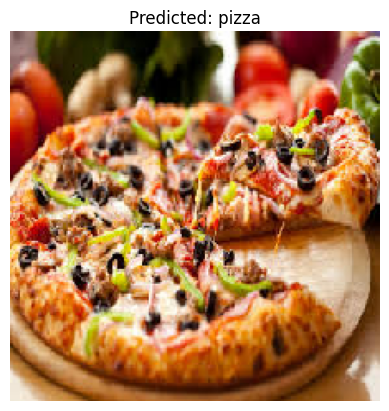

In [31]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image

# Load the trained model
model = tf.keras.models.load_model("food_recognition_model.h5")

# Load and preprocess the image
img_path = r"1.jpg"  # Update with your image path
img = image.load_img(img_path, target_size=(224, 224))  # Resize to model input size
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension
img_array /= 255.0  # Normalize

# Make a prediction
predictions = model.predict(img_array)
predicted_class = np.argmax(predictions, axis=1)[0]  # Get the class index

# Load class labels from your dataset
class_labels = list(train_generator.class_indices.keys())  # Get class names
predicted_label = class_labels[predicted_class]

# Display the image with the predicted label
plt.imshow(img)
plt.title(f"Predicted: {predicted_label}")
plt.axis("off")
plt.show()


1/1 [==============================] - 0s 25ms/step


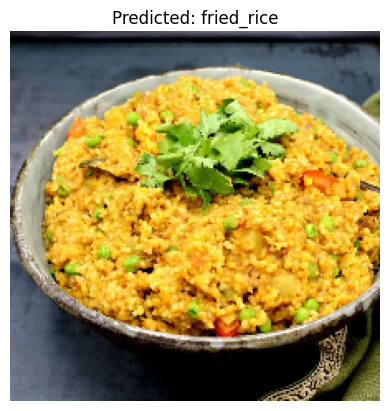

In [34]:
# Load and preprocess the image
img_path1 = r"2.jpg"  # Update with your image path
img = image.load_img(img_path1, target_size=(224, 224))  # Resize to model input size
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension
img_array /= 255.0  # Normalize

# Make a prediction
predictions = model.predict(img_array)
predicted_class = np.argmax(predictions, axis=1)[0]  # Get the class index

# Load class labels from your dataset
class_labels = list(train_generator.class_indices.keys())  # Get class names
predicted_label = class_labels[predicted_class]

# Display the image with the predicted label
plt.imshow(img)
plt.title(f"Predicted: {predicted_label}")
plt.axis("off")
plt.show()


1/1 [==============================] - 0s 25ms/step


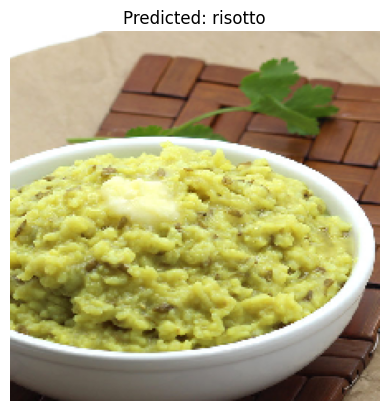

In [35]:
# Load and preprocess the image
img_path2 = r"3.jpg"  # Update with your image path
img = image.load_img(img_path2, target_size=(224, 224))  # Resize to model input size
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension
img_array /= 255.0  # Normalize

# Make a prediction
predictions = model.predict(img_array)
predicted_class = np.argmax(predictions, axis=1)[0]  # Get the class index

# Load class labels from your dataset
class_labels = list(train_generator.class_indices.keys())  # Get class names
predicted_label = class_labels[predicted_class]

# Display the image with the predicted label
plt.imshow(img)
plt.title(f"Predicted: {predicted_label}")
plt.axis("off")
plt.show()


1/1 [==============================] - 0s 25ms/step


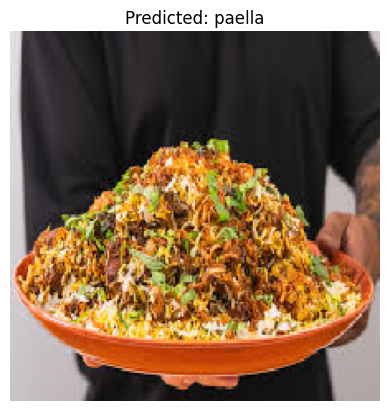

Enter weight (grams) of paella (Default: 150g):  100



 **Prediction Results:**
 **Predicted Food:** paella
 **User-Provided Weight:** 100.0g
 **Estimated Calories:** 220.00 kcal


In [54]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt

# Dictionary containing calorie estimates per gram
calorie_dict = {
    "apple_pie": 2.37, "baby_back_ribs": 3.92, "baklava": 4.2, "beef_carpaccio": 2.5,
    "beef_tartare": 2.6, "beet_salad": 1.2, "beignets": 4.5, "bibimbap": 1.6, 
    "bread_pudding": 2.8, "breakfast_burrito": 2.5, "bruschetta": 2.3, "caesar_salad": 1.6,
    "cannoli": 4.3, "caprese_salad": 1.5, "carrot_cake": 3.9, "ceviche": 1.3,
    "cheesecake": 3.6, "cheese_plate": 3.8, "chicken_curry": 1.9, "chicken_quesadilla": 2.8,
    "chicken_wings": 3.2, "chocolate_cake": 3.9, "chocolate_mousse": 3.5, "churros": 4.2,
    "clam_chowder": 1.4, "club_sandwich": 2.5, "crab_cakes": 2.7, "creme_brulee": 3.1,
    "croque_madame": 3.3, "cup_cakes": 4.1, "deviled_eggs": 2.3, "donuts": 4.5,
    "dumplings": 2.0, "edamame": 1.2, "eggs_benedict": 2.7, "escargots": 2.1,
    "falafel": 2.9, "filet_mignon": 2.5, "fish_and_chips": 2.8, "foie_gras": 4.1,
    "french_fries": 3.5, "french_onion_soup": 1.6, "french_toast": 2.7, "fried_calamari": 3.3,
    "fried_rice": 2.1, "frozen_yogurt": 1.5, "garlic_bread": 3.4, "gnocchi": 1.8,
    "greek_salad": 1.3, "grilled_cheese_sandwich": 3.2, "grilled_salmon": 2.2,
    "guacamole": 1.7, "gyoza": 2.0, "hamburger": 2.9, "hot_and_sour_soup": 1.1,
    "hot_dog": 3.1, "huevos_rancheros": 2.5, "hummus": 1.9, "ice_cream": 2.2,
    "lasagna": 2.6, "lobster_bisque": 1.8, "lobster_roll_sandwich": 2.9,
    "macaroni_and_cheese": 2.7, "macarons": 4.3, "miso_soup": 0.8, "mussels": 1.3,
    "nachos": 3.2, "omelette": 2.4, "onion_rings": 3.8, "oysters": 1.2,
    "pad_thai": 2.5, "paella": 2.2, "pancakes": 2.8, "panna_cotta": 3.0,
    "peking_duck": 3.1, "pho": 1.4, "pizza": 2.7, "pork_chop": 2.6, "poutine": 3.5,
    "prime_rib": 3.8, "pulled_pork_sandwich": 2.9, "ramen": 1.9, "ravioli": 2.4,
    "red_velvet_cake": 3.7, "risotto": 2.3, "samosa": 3.0, "sashimi": 1.1,
    "scallops": 1.5, "seaweed_salad": 0.9, "shrimp_and_grits": 2.8,
    "spaghetti_bolognese": 2.2, "spaghetti_carbonara": 2.4, "spring_rolls": 2.0,
    "steak": 2.6, "strawberry_shortcake": 3.3, "sushi": 1.3, "tacos": 2.7,
    "takoyaki": 2.9, "tiramisu": 3.4, "tuna_tartare": 2.0, "waffles": 3.0,"biryani": 2.5,  "butter_chicken": 2.9,  
    "chana_masala": 1.8,  
    "dal_makhani": 1.6,  
    "paneer_butter_masala": 2.7,  
    "samosa": 3.0,
    "vada_pav": 2.8,  "pav_bhaji": 2.5,  
    "masala_dosa": 2.2,  
    "idli": 1.2,      "poha": 1.5,  
    "jalebi": 4.0,
    "gulab_jamun": 3.9,
    "rasgulla": 3.5,  
    "butter_naan": 3.2, 
    "paratha": 2.9,  
    "mango_lassi": 1.8, 
    "roti": 1.5,  
    "dal_tadka": 1.4,
    "fish_curry": 2.0,"keema_paratha": 3.1, "rajma": 1.7, 
    "kadhi_pakora": 1.8, 
    "malai_kofta": 2.9,  "tandoori_chicken": 2.3,
    "mutton_curry": 3.0, 
    "pani_puri": 2.2, 
    "sev_puri": 2.4,  
    "misal_pav": 2.6,  "chole_bhature": 3.1, 
    "kheer": 2.5,  
    "sheer_korma": 3.3, 
    "payasam": 2.1,  
    "aloo_puri": 2.7, 
    "modak": 3.5,  
    "thepla": 2.0,  
    "kachori": 3.2,    "gajar_halwa": 3.0,
    "shrikhand": 2.8,  

}

# Function to predict food category and estimate calories
def predict_food_and_calories(img_path, model, calorie_dict, default_weight=150):
    # Load and preprocess the image
    img = image.load_img(img_path, target_size=(224, 224))
    img_array = image.img_to_array(img) / 255.0
    img_array = np.expand_dims(img_array, axis=0)

    

    # Predict food class
    predictions = model.predict(img_array)
    predicted_class_index = np.argmax(predictions)
    class_labels = list(calorie_dict.keys())
    predicted_class = class_labels[predicted_class_index]
    
    # Display image for reference
    plt.imshow(img)
    plt.title(f"Predicted: {predicted_class}")
    plt.axis("off")
    plt.show()
    # Get user input for weight
    try:
        weight = float(input(f"Enter weight (grams) of {predicted_class} (Default: {default_weight}g): ") or default_weight)
        if weight <= 0:
            print(f" Invalid weight! Using default {default_weight}g.")
            weight = default_weight
    except ValueError:
        print(f" Invalid input! Using default {default_weight}g.")
        weight = default_weight

    # Estimate calories
    calories_per_gram = calorie_dict.get(predicted_class, 2.5)  # Default 2.5 cal/g
    estimated_calories = calories_per_gram * weight

    # Print results
    print("\n **Prediction Results:**")
    print(f" **Predicted Food:** {predicted_class}")
    print(f" **User-Provided Weight:** {weight}g")
    print(f" **Estimated Calories:** {estimated_calories:.2f} kcal")
    
    return predicted_class, estimated_calories

# Example usage
img_path = "4.jpg"  # Replace with actual image path
predicted_food, estimated_calories = predict_food_and_calories(img_path, model, calorie_dict)
